In [1]:
import os

In [2]:
dataset_path = 'C:/pythonn/cat_dog_dataset/'

In [3]:
num_cat_images = len(os.listdir(os.path.join(dataset_path, 'cat')))
num_dog_images = len(os.listdir(os.path.join(dataset_path, 'dog')))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/pythonn/cat_dog_dataset/cat'

In [5]:
print("Number of cat images:", num_cat_images)
print("Number of dog images:", num_dog_images)

Number of cat images: 349
Number of dog images: 348


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
labels = ['Cat', 'Dog']
counts = [num_cat_images, num_dog_images]

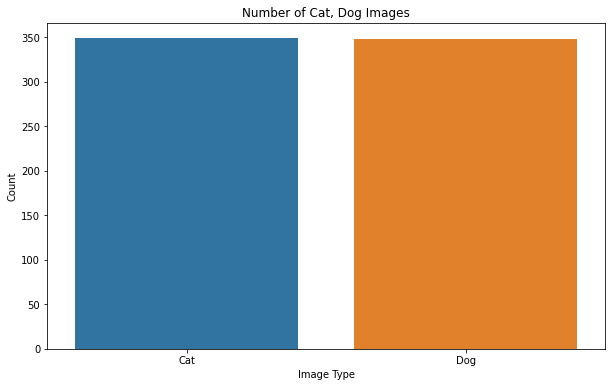

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Number of Cat, Dog Images')
plt.show()

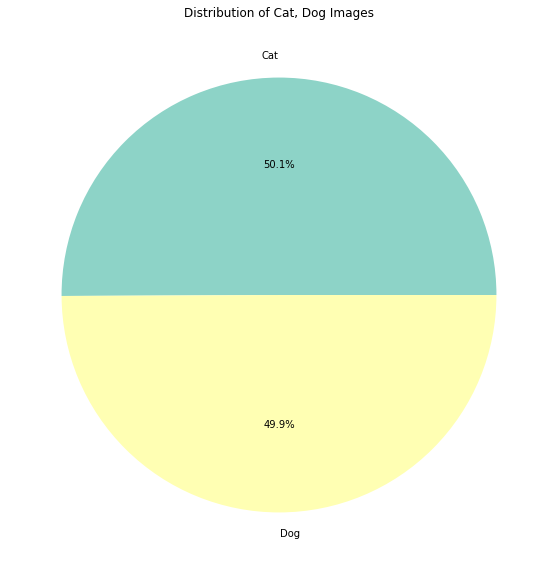

In [9]:
plt.figure(figsize=(10, 10))
sns.set_palette("Set3") 
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Cat, Dog Images')
plt.show()

In [10]:
import plotly.express as px

In [13]:
fig = px.bar(x=labels, y=counts)
fig.update_layout(
    xaxis_title='Image Type',
    yaxis_title='Count',
    title='Number of Cat, Dog Images',
    width=600,
    height=400
)
fig.show()

In [14]:
import plotly.graph_objects as go

In [15]:
fig = go.Figure(data=[go.Pie(labels=labels, values=counts, textinfo='percent', 
                             insidetextorientation='radial')])
fig.update_layout(
    title='Distribution of Cat, Dog Images',
    width=800,
    height=500
)
fig.show()

In [16]:
cat_path = os.path.join(dataset_path, 'cat')
dog_path = os.path.join(dataset_path, 'dog')

In [17]:
cat_files = os.listdir(cat_path)

In [18]:
import cv2

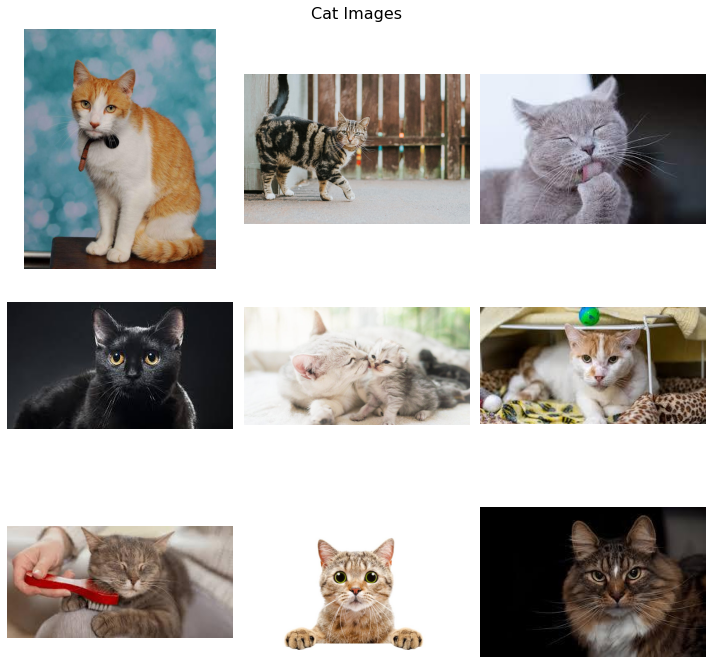

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Cat Images', fontsize=16)
axes = axes.ravel() # This line reshapes the 3x3 array of axes into a 1D array, making it easier to iterate over the subplots.

for i, image_file in enumerate(cat_files[:9]):
    image_path = os.path.join(cat_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [20]:
dog_files = os.listdir(dog_path)

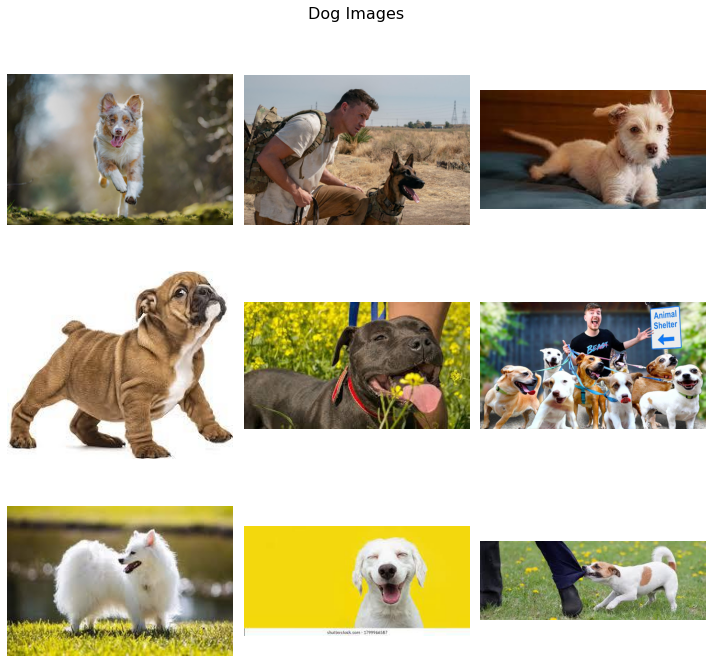

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Dog Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(dog_files[:9]):
    image_path = os.path.join(dog_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [22]:
def load_and_preprocess_images(image_folder):
    image_files = os.listdir(image_folder)
    images = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            images.append(image)
    return images

In [24]:
cat_files = load_and_preprocess_images(os.path.join(dataset_path, 'cat'))
dog_files = load_and_preprocess_images(os.path.join(dataset_path, 'dog'))

In [25]:
import numpy as np

In [26]:
cat_files = np.array(cat_files).reshape(-1, 256, 256, 3)
dog_files = np.array(dog_files).reshape(-1, 256, 256, 3)

cat_files and dog_files are presumably lists or arrays containing image data.

np.array(cat_files) and np.array(dog_files) are used to convert these lists/arrays into NumPy arrays.

.reshape(-1, 256, 256, 3) is used to reshape these arrays into a 4D format with the following dimensions:

-1: This is a placeholder for an unknown dimension. The use of -1 here means that NumPy will automatically calculate the size of this dimension based on the total number of elements in the array. In this context, it's often used to reshape a 1D or 2D array into a higher-dimensional array while maintaining the total number of elements.

256: This represents the height dimension of the images, setting it to 256 pixels.

256: This represents the width dimension of the images, also set to 256 pixels.

3: This represents the number of color channels in the images. It's typically 3 for RGB color images (red, green, blue).

So, when you execute these lines of code, cat_files and dog_files are reshaped into 4D arrays where each element corresponds to an image with dimensions 256x256 pixels and 3 color channels (RGB). The use of -1 in the first dimension ensures that the total number of elements remains the same as in the original arrays, and the dimensions are adjusted accordingly.

In [27]:
all_files = np.concatenate((cat_files, dog_files), axis=0)

In [29]:
all_labels = np.concatenate((
    np.zeros(len(cat_files)),
    np.ones(len(dog_files)),
))

In [30]:
all_files_flat = all_files.reshape(-1, all_files.shape[1] * all_files.shape[2] * all_files.shape[3])


The code you provided is reshaping a 4D NumPy array called all_files into a 2D array called all_files_flat. Let me explain what this code does step by step:

all_files is a 4D NumPy array, typically representing a collection of images. The dimensions of this array are as follows:

The first dimension represents the number of images (the "batch size").
The second dimension represents the height of each image.
The third dimension represents the width of each image.
The fourth dimension represents the number of color channels in each image (e.g., 3 for RGB images).
all_files.shape[1] * all_files.shape[2] * all_files.shape[3] calculates the total number of elements in each image. This is done by multiplying the dimensions of height, width, and color channels. Essentially, it computes the size of a flattened version of each image.

reshape(-1, all_files.shape[1] * all_files.shape[2] * all_files.shape[3]) reshapes the 4D array all_files into a 2D array called all_files_flat. The -1 in the first dimension indicates that NumPy should calculate the size of this dimension based on the total number of elements in the original array. The second dimension is set to the size of each flattened image.

In [31]:
cat_files_new = all_files_flat[all_labels == 0].reshape(-1, 256, 256, 3)
dog_files_new = all_files_flat[all_labels == 1].reshape(-1, 256, 256, 3)

print("Resampled cat files shape:", cat_files_new.shape)
print("Resampled dog files shape:", dog_files_new.shape)

Resampled cat files shape: (349, 256, 256, 3)
Resampled dog files shape: (348, 256, 256, 3)


all_labels is assumed to be a 1D NumPy array or list containing labels for each of the images in all_files_flat. For example, 0 might represent cats, and 1 might represent dogs.

all_files_flat is a 2D NumPy array where each row represents a flattened version of an image.

all_labels == 0 is a boolean condition that checks which elements in all_labels are equal to 0. This results in a boolean mask with True where the condition is met (cat labels) and False elsewhere.

all_files_flat[all_labels == 0] uses the boolean mask to select rows from all_files_flat where the corresponding label is 0. This effectively filters out the rows corresponding to cat images.

.reshape(-1, 256, 256, 3) reshapes the filtered data into a 4D array, where -1 in the first dimension is used to calculate the size of this dimension based on the remaining dimensions. The dimensions (256, 256, 3) specify the desired shape of each image (height, width, color channels).

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [33]:
cat_files_new = cat_files_new.astype('float32') / 255.0
dog_files_new = dog_files_new.astype('float32') / 255.0

In [34]:
image_shape = (256,256)

In [35]:
X = np.concatenate((cat_files_new, dog_files_new))
y = np.concatenate(([0]*349, [1]*348))

In [36]:
X_resized = np.array([cv2.resize(image, image_shape) for image in X])
X_flattened = X_resized.reshape(X_resized.shape[0], -1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, 
                                                    test_size=0.2, 
                                                    stratify = y, 
                                                    random_state=42)

In [38]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [39]:
y_pred = svm_model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.64


In [43]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.6425653594771242
Precision: 0.6433251433251432
Recall: 0.6428571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65        70
           1       0.65      0.61      0.63        70

    accuracy                           0.64       140
   macro avg       0.64      0.64      0.64       140
weighted avg       0.64      0.64      0.64       140

Confusion Matrix:
 [[47 23]
 [27 43]]


In [44]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = dt_model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.56


In [47]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.5631936985320444
Precision: 0.564935064935065
Recall: 0.5642857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.51      0.54        70
           1       0.56      0.61      0.59        70

    accuracy                           0.56       140
   macro avg       0.56      0.56      0.56       140
weighted avg       0.56      0.56      0.56       140

Confusion Matrix:
 [[36 34]
 [27 43]]


In [48]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = rf_model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.65


In [51]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.64695589521898
Precision: 0.6553582752060875
Recall: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.74      0.68        70
           1       0.68      0.56      0.61        70

    accuracy                           0.65       140
   macro avg       0.66      0.65      0.65       140
weighted avg       0.66      0.65      0.65       140

Confusion Matrix:
 [[52 18]
 [31 39]]


In [52]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [57]:
model = Sequential()

In [58]:
model.add(Conv2D(32, (3, 3), 
                 activation='relu', 
                 kernel_initializer='he_uniform',
                 padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy', 
              metrics=['accuracy'])

c:\pythonn\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [61]:
full_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [62]:
full_data = full_datagen.flow_from_directory(
    'cat_dog_dataset',
    class_mode='binary',
    batch_size=64,
    target_size=(150, 150)
)

Found 697 images belonging to 2 classes.


In [64]:
history = model.fit_generator(
    full_data,
    steps_per_epoch=len(full_data),
    validation_data=full_data, 
    validation_steps=len(full_data),  
    epochs = 20
)

C:\Users\hp5cd\AppData\Local\Temp\ipykernel_8304\3041540770.py:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/20
11/11 [==============================] - 25s 2s/step - loss: 0.6923 - accuracy: 0.5079 - val_loss: 0.6900 - val_accuracy: 0.5093
Epoch 2/20
11/11 [==============================] - 24s 2s/step - loss: 0.6902 - accuracy: 0.5294 - val_loss: 0.6894 - val_accuracy: 0.5696
Epoch 3/20
11/11 [==============================] - 24s 2s/step - loss: 0.6901 - accuracy: 0.5380 - val_loss: 0.6889 - val_accuracy: 0.4907
Epoch 4/20
11/11 [==============================] - 25s 2s/step - loss: 0.6896 - accuracy: 0.5294 - val_loss: 0.6855 - val_accuracy: 0.5595
Epoch 5/20
11/11 [==============================] - 24s 2s/step - loss: 0.6833 - accuracy: 0.5538 - val_loss: 0.6852 - val_accuracy: 0.5093
Epoch 6/20
11/11 [==============================] - 26s 2s/step - loss: 0.6864 - accuracy: 0.5423 - val_loss: 0.6788 - val_accuracy: 0.5940
Epoch 7/20
11/11 [==============================] - 25s 2s/step - loss: 0.6867 - accuracy: 0.5380 - val_loss: 0.6771 - val_accuracy: 0.5739
Epoch 8/20
11/11 [==

In [65]:
model.save('cats-vs-dogs.h5')

In [66]:
train_loss, train_accuracy = model.evaluate(full_data, steps=len(full_data))
print("Training Accuracy:", train_accuracy)

11/11 [==============================] - 9s 807ms/step - loss: 0.6570 - accuracy: 0.6471
Training Accuracy: 0.6470588445663452


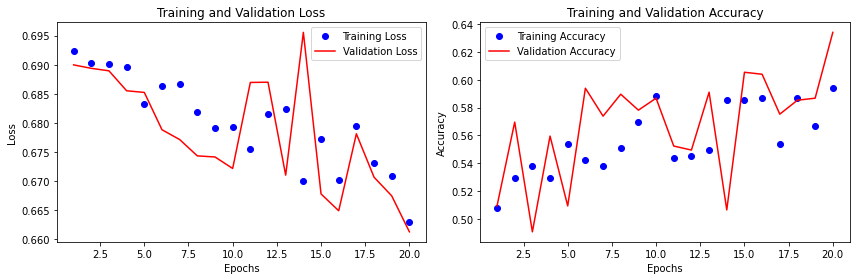

In [68]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()